# Apply Data Storytelling. Section 7.3

In [2]:
from branca.element import Figure
import pygeohash as gh
import folium
from folium import plugins
import googlemaps
from googlemaps import convert
from geopy.geocoders import Nominatim
from pygeocoder import Geocoder
from geopy.distance import vincenty
from collections import Counter 
from bs4 import BeautifulSoup
import urllib.request
import datetime
import json
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
import pandas.plotting
from IPython import display
from ipywidgets import interact, widgets
import re
import csv
import datetime
import googlemaps
%matplotlib inline
#from mpl_toolkits.basemap import Basemap
#from collections import defauldict

In [11]:
df = pd.read_csv('train.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 15 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
GeoHash_Pick          1458644 non-null object
GeoHash_Drop          1458644 non-null object
Place_Pick            1458644 non-null object
Place_Drop            1458644 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 166.9+ MB


In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Q1-Ask the following questions and look for the answers using code and plots

1-Can you count something interesting?

Answer: I would like to know the volume of the trips picked up from Manhattan and also dropped in Manhattan.
In order to do this, we need to do some geohashing to figure out where the trip was picked up and dropped off exactly. I will use geohashing coordinates to do this.


In [12]:
# Function that calculates the distance from the geocoordinates.
def distance(x1, y1, x2, y2):
    dist = []
    for i in range(len(x1)):
        dist.append(vincenty((x1[i], y1[i]), (x2[i], y2[i])).miles)
    return dist

#Applying the distance function
df['Geo_Distance/mi'] = distance(df.pickup_latitude, df.pickup_longitude, 
                                 df.dropoff_latitude, df.dropoff_longitude)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  """


In [26]:
# Function that calculates the Speed Using the Geodistance/Not the driving ditance.
def speed(X, Y):
    spd = []
    for i in range(len(X)):
        spd.append(float((X[i]*3600)/Y[i]))
    return spd

#Applying the Speed function
df['Geo_Speed(mi/h)'] = speed(df['Geo_Distance/mi'], df['trip_duration'])

In [14]:
#Creating a Columns for the GeoHash Coordinates
df['GeoHash_Pick']=df.apply(lambda x: gh.encode(x.pickup_latitude, x.pickup_longitude, precision=6), axis=1)
df['GeoHash_Drop']=df.apply(lambda x: gh.encode(x.dropoff_latitude, x.dropoff_longitude, precision=6), axis=1)

In [15]:
#GeoHashing Coordinates
Manhattan = ['dr5rec', 'dr5re9', 'dr5red', 'dr5ref', 'dr5ree', 'dr5reg', 'dr5rs5', 'dr5rs4', 'dr5res',
 'dr5reu', 'dr5rsh', 'dr5rs7', 'dr5rse', 'dr5rsj', 'dr5rsm', 'dr5rst', 'dr5rsh', 'dr5rsk', 
 'dr5rss', 'dr5rev', 'dr5reu', 'dr5rez', 'dr5rsp', 'dr5rsr', 'dr5rey', 'dr5rsn', 'dr5rsq', 
'dr5rsx', 'dr5rsw', 'dr5ru1', 'dr5ru3', 'dr5ru9', 'dr5ru0', 'dr5ru2', 'dr5ru8', 'dr5rgc', 
 'dr5rgb', 'dr5rgg', 'dr5ru5', 'dr5ru7', 'dr5rgf', 'dr5ru4', 'dr5ru6', 'dr5ruh', 'dr5ruk', 
 'dr5rus', 'dr5rue', 'dr5rud', 'dr5rug', 'dr5ruf', 'dr5ruu', 'dr5rvh', 'dr5ruw', 'dr5ruy', 
 'dr5rvn', 'dr5rut', 'dr5ruv', 'dr5rvj', 'dr5ruq', 'dr5rum', 'dr5ruj', 'dr5run', 'dr5rvq', 
 'dr72hb', 'dr72j0', 'dr72j2', 'dr5ruz', 'dr5rvp', 'dr5rvr', 'dr72h8', 'dr5rux', 'dr72h2', 
'dr5rur', 'dr72hd', 'dr72hf', 'dr72j4', 'dr72h9', 'dr72hc', 'dr72j1', 'dr72j6', 'dr72j3', 
'dr72j9', 'dr72jd', 'dr72jh', 'dr72jk', 'dr72js', 'dr72j5', 'dr72j7', 'dr72je', 'dr72hg', 
'dr72hu', 'dr72he', 'dr72hs']
LGA_Airport = ['dr5ryx', 'dr5ryz', 'dr5rzp', 'dr5ryw', 'dr5ryy', 'dr5rzn', 'dr5rzj', 'dr5rzm',
              'dr5rzq', ]
JFK_Airport = ['dr5x0r', 'dr5x0x', 'dr5x0w', 'dr5x0z', 'dr5x0y', 'dr5x0v', 'dr5x1n', 'dr5x1j', 
              'dr5x1p', 'dr5x28', 'dr5x2b', 'dr5x30', 'dr5x29', 'dr5x2c', 'dr5x31', 'dr5x22', 
               'dr5x23', 'dr5x24', 'dr5x26', 'dr5x2d', 'dr5x2f']

In [16]:
#Creating a column for the pick up place
df['Place_Pick'] = df.apply(lambda x: 'Manhattan' if x['GeoHash_Pick'] in Manhattan 
                            else 'JFK Airport' if x['GeoHash_Pick'] in JFK_Airport 
                            else 'LGA Airport' if x['GeoHash_Pick'] in LGA_Airport
                            else 'other', axis=1)

In [17]:
#Creating a column for the drop-off place
df['Place_Drop'] = df.apply(lambda x: 'Manhattan' if x['GeoHash_Drop'] in Manhattan 
                            else 'JFK Airport' if x['GeoHash_Drop'] in JFK_Airport 
                            else 'LGA Airport' if x['GeoHash_Drop'] in LGA_Airport
                            else 'other', axis=1)

In [18]:
#Creating a df for trips picked up from Manhattan only (the island)
Manhattan_Pick_df = df[df.Place_Pick == 'Manhattan']
len(Manhattan_Pick_df)

1332647

In [19]:
#Creating a df for trips dropped off in Manhattan only (the island)
Manhattan_Drop_df = df[df.Place_Drop == 'Manhattan']
len(Manhattan_Drop_df)

1259912

In [20]:
#Creating a df for trips picked up and dropped off in Manhattan only (the island)
Pick_Drop_Manhattan = df[(df.Place_Drop == 'Manhattan') & (df.Place_Pick == 'Manhattan')]
len(Pick_Drop_Manhattan)

1198921

The tripped picked up and dropped off in Manhattan seem to be the biggest chunck of our data with 1198921 trips.


2-Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

3-Can you make a bar plot or a histogram?

Answer: I will try to find out when are the busiest hour of the day by seperating the trips picked up in each hour. This will be answered by a bar plot.

In [21]:
Pick_Drop_Manhattan.pickup_datetime = pd.to_datetime(Pick_Drop_Manhattan.pickup_datetime)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
#Pick_Drop_Manhattan.pickup_datetime = pd.to_datetime(Pick_Drop_Manhattan.pickup_datetime)
Pick_Drop_Manhattan.set_index('pickup_datetime',inplace=True)

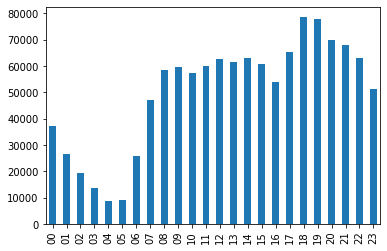

In [23]:
by_hour = Pick_Drop_Manhattan.groupby(Pick_Drop_Manhattan.index.strftime('%H'))
by_hour['id'].count().plot.bar()

We can see from the plot that 6PM and 7PM are the busiest hours of the day, and 4AM and 5AM are the slowest hours of the day.

4-Can you compare two related quantities?

5-Can you make a scatterplot?

Answer: I will compare the distance and the speed. I'm going to try to find out if the speed increases or decreases for short and long distances.
For this, I will have to first create calculate the distance using Folium.

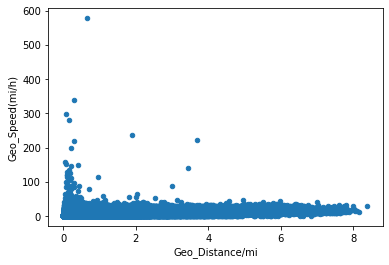

In [28]:
Pick_Drop_Manhattan.plot(kind='scatter', x='Geo_Distance/mi', y='Geo_Speed(mi/h)')

# Q2-Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

Looking at the plot, I can see that there are a lot of outliers. There is no way a trip's speed is almost 600mi/h or 0mi/h. I can notice that there is a slight correllation between the distance and the speed. I would like to investigate the average of the speed by hour of the day and the average of the speed by Geohashing pick up location.

# Q3-Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

Ploting the data on a New York map should be a great way to present the data and give a better insight on the area that have slower and faster trips.